In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import cv2

In [3]:
img = cv2.imread('./elephant.jpg')

In [4]:
print(img.shape)

(330, 500, 3)


In [5]:
original_shape = img.shape

In [6]:
plt.style.use('seaborn')

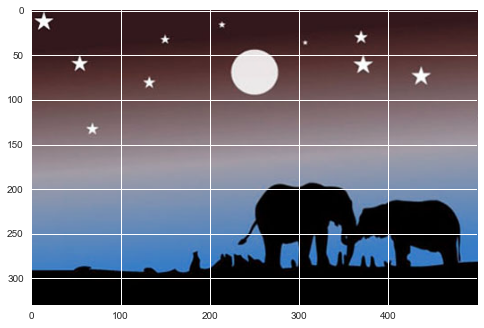

In [7]:
plt.imshow(img)

openCV reads img as BGR and Matplotlib displays as RGB

In [8]:
im = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

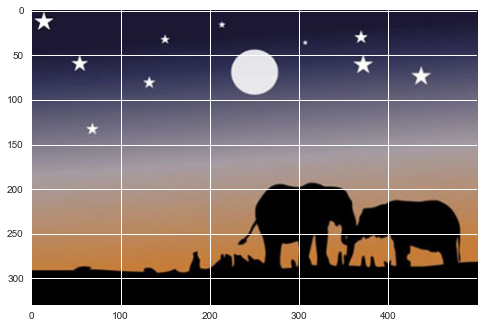

In [9]:
plt.imshow(im)

In [10]:
# Flatten Each Channel Of Image
all_pixels = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


In [11]:
# Distance between two points Eucladian Distance
def distance(a1,a2):
    return np.sqrt(np.sum((a1-a2)**2))

In [12]:
class KMeans():
    def __init__(self,k=5,max_iter=100):
        self.k= k
        self.max_iter=max_iter
        self.clusters = {}
        self.label = []
        
    def initialization(self,X):
        for i in range(self.k):
            center = 10*(2*np.random.random((X.shape[1],))-1)
            points = []
            cluster = {
                'center':center,
                'points':points,
                'id'    :i
            }
            self.clusters[i]=cluster
        self.label = np.zeros((X.shape[0],1))
    
    def assignPointTOClusters(self,X):
        for i in range(X.shape[0]):
            dist = []
            curr_x = X[i]
        
            for ki in range(self.k):
                d = distance(curr_x,self.clusters[ki]['center'])
                dist.append(d)
            
            current_cluster = np.argmin(dist)
            self.clusters[current_cluster]['points'].append(curr_x)
            self.label[i]=(self.clusters[current_cluster]['id'])
            
    def updateClusters(self):
        for kx in range(self.k):
            pts = np.array(self.clusters[kx]['points'])
            
            if pts.shape[0]>0: # If cluster has some nonzero points
                new_u = pts.mean(axis=0)
                self.clusters[kx]['center'] = new_u
                # Clear the list
                self.clusters[kx]['points'] = []
    
    def plotClusters(self):
        for kx in range(self.k):
            print(len(self.clusters[kx]['points']))
#             pts = np.array(self.clusters[kx]['points'])
#             # plot points , cluster center
#             try:
#                 plt.scatter(pts[:,0],pts[:,1])
#             except:
#                 pass
#             uk = self.clusters[kx]['center']
#             plt.scatter(uk[0],uk[1],color='black',marker="*")
#         plt.show()
            
    def fit(self,X):
        print(self.k)
        self.initialization(X)
        for i in range(self.max_iter):
            print("i is ",i)
            self.assignPointTOClusters(X)
            self.plotClusters()
            self.updateClusters()
#     def giveCenters():
#         c = self.clusters[ki]['center']
#         c = np.array(c)
#         return c

In [25]:
dominant_colors = 4
km = KMeans(k=dominant_colors,max_iter=30)
km.fit(all_pixels)

4
i is  0
7688
132882
510
23920
i is  1
30743
100943
3473
29841
i is  2
42817
87723
4534
29926
i is  3
48361
81866
3373
31400
i is  4
49946
79977
2143
32934
i is  5
49333
79283
2717
33667
i is  6
33173
78736
19073
34018
i is  7
29622
74875
26179
34324
i is  8
28783
71392
30423
34402
i is  9
28873
68689
32988
34450
i is  10
29100
66987
34434
34479
i is  11
29719
65565
35210
34506
i is  12
29922
64596
35973
34509
i is  13
29579
64195
36705
34521
i is  14
29559
63821
37094
34526
i is  15
29449
63750
37271
34530
i is  16
29516
63600
37352
34532
i is  17
29380
63529
37558
34533
i is  18
29276
63523
37667
34534
i is  19
29270
63515
37680
34535
i is  20
29268
63515
37682
34535
i is  21
29268
63515
37682
34535
i is  22
29268
63515
37682
34535
i is  23
29268
63515
37682
34535
i is  24
29268
63515
37682
34535
i is  25
29268
63515
37682
34535
i is  26
29268
63515
37682
34535
i is  27
29268
63515
37682
34535
i is  28
29268
63515
37682
34535
i is  29
29268
63515
37682
34535


In [26]:
c=[]
for i in range(km.k):
    c.append(km.clusters[i]['center'])

In [27]:
print(c)

[array([ 99.17555009,  95.27282356, 118.17264589]), array([174.83470046, 145.27892624, 128.24945289]), array([38.25187092, 35.54999735, 64.76206146]), array([1.49862458, 0.83828001, 1.15595772])]


In [28]:
c = np.array(c,dtype='uint8')

In [29]:
print(c)

[[ 99  95 118]
 [174 145 128]
 [ 38  35  64]
 [  1   0   1]]


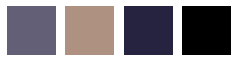

In [30]:
# We are going to make 1 X 4 subplot each having a single color
i=1
plt.figure(0,figsize=(4,2))

colors = []
for each_col in c:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    # Color Switch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
plt.show()

## Segmenting Image

In [31]:
new_image = np.zeros((330*500,3),dtype='uint8')
print(new_image.shape)

(165000, 3)


In [32]:
colors

[array([ 99,  95, 118], dtype=uint8),
 array([174, 145, 128], dtype=uint8),
 array([38, 35, 64], dtype=uint8),
 array([1, 0, 1], dtype=uint8)]

In [33]:
km.clusters

{0: {'center': array([ 99.17555009,  95.27282356, 118.17264589]),
  'points': [],
  'id': 0},
 1: {'center': array([174.83470046, 145.27892624, 128.24945289]),
  'points': [],
  'id': 1},
 2: {'center': array([38.25187092, 35.54999735, 64.76206146]),
  'points': [],
  'id': 2},
 3: {'center': array([1.49862458, 0.83828001, 1.15595772]),
  'points': [],
  'id': 3}}

For each pixel it is giving us some id.

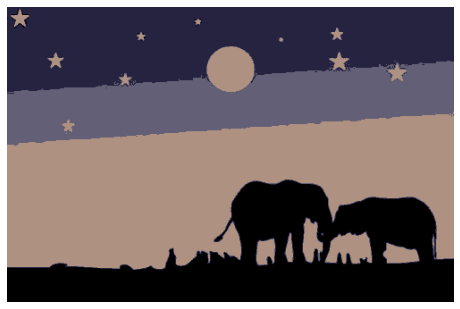

In [34]:
for i in range(new_image.shape[0]):
    l = int(km.label[i])
    new_image[i] = colors[l]
    
new_image = new_image.reshape((original_shape))
plt.axis("off")
plt.imshow(new_image)
plt.show()